In [40]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from typing import List

In [136]:
tag = "econgames_learning"
learner = "mirror_ascent(entropic)"
n_agents = 2
n_discr = 11
df = pd.read_csv(f"{PATH_TO_DATA}{tag}/{learner}_{n_agents}_{n_discr}.csv")
df = df.groupby(["game", "potentialness",]).agg({"run":"count", "convergence": "mean"}).reset_index()

In [146]:
df[df.game=="allpay"]

,game,potentialness,run,convergence
0,allpay,0.000000,10,0.0
1,allpay,0.052632,10,0.0
2,allpay,0.105263,10,0.0
3,allpay,0.157895,10,0.0
4,allpay,0.210526,10,0.0
5,allpay,0.263158,10,0.0
6,allpay,0.315789,10,0.0
7,allpay,0.368421,10,0.0
8,allpay,0.421053,10,0.0
9,allpay,0.473684,10,0.0


In [185]:
def generate_plot_learning_random(list_games, label_games, n_agents, n_discr):
    # get data
    tag = "econgames_learning"
    learner = "mirror_ascent(entropic)"
    df = pd.read_csv(f"{PATH_TO_DATA}{tag}/{learner}_{n_agents}_{n_discr}.csv")
    df = df.groupby(["game", "potentialness",]).agg({"run":"count", "convergence": "mean"}).reset_index()

    # prepare plot
    fig = plt.figure(tight_layout = True, dpi=DPI, figsize=(5,2.1))
    ax = fig.add_subplot(111)
    ax.set_xlabel("Potentialness", fontsize=FONTSIZE_LABEL)
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.8,len(list_games)-0.2)
    ax.set_yticks(range(len(list_games)), label_games)
    ax.grid(linestyle="-", linewidth=0.25, color="lightgrey", zorder=-10, alpha=0.2)
    ax.set_title(f"{n_agents} Agents",)

    for i, game in enumerate(list_games):
        tmp = df[df.game==game]
        # plot results
        sc = ax.scatter(
                tmp.potentialness,
                i * np.ones(len(tmp)),
                marker="s",
                s=140,
                c=np.array(tmp.convergence) * 100,
                cmap="RdBu",
                vmin=0,
                vmax=100,
                )
    # cbar_ax = fig.add_axes([1.0, 0.155, 0.03, 0.755])  # vertical
    cbar_ax = fig.add_axes([0.21, -0.05, 0.655, 0.03])  # horizontal
    cbar = fig.colorbar(sc, cax=cbar_ax, orientation="horizontal")
    cbar.set_label('Convergence (%)', fontsize=FONTSIZE_LABEL-2)

/home/oberlechner/projects/matrix_game_learning/venv/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/home/oberlechner/projects/matrix_game_learning/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


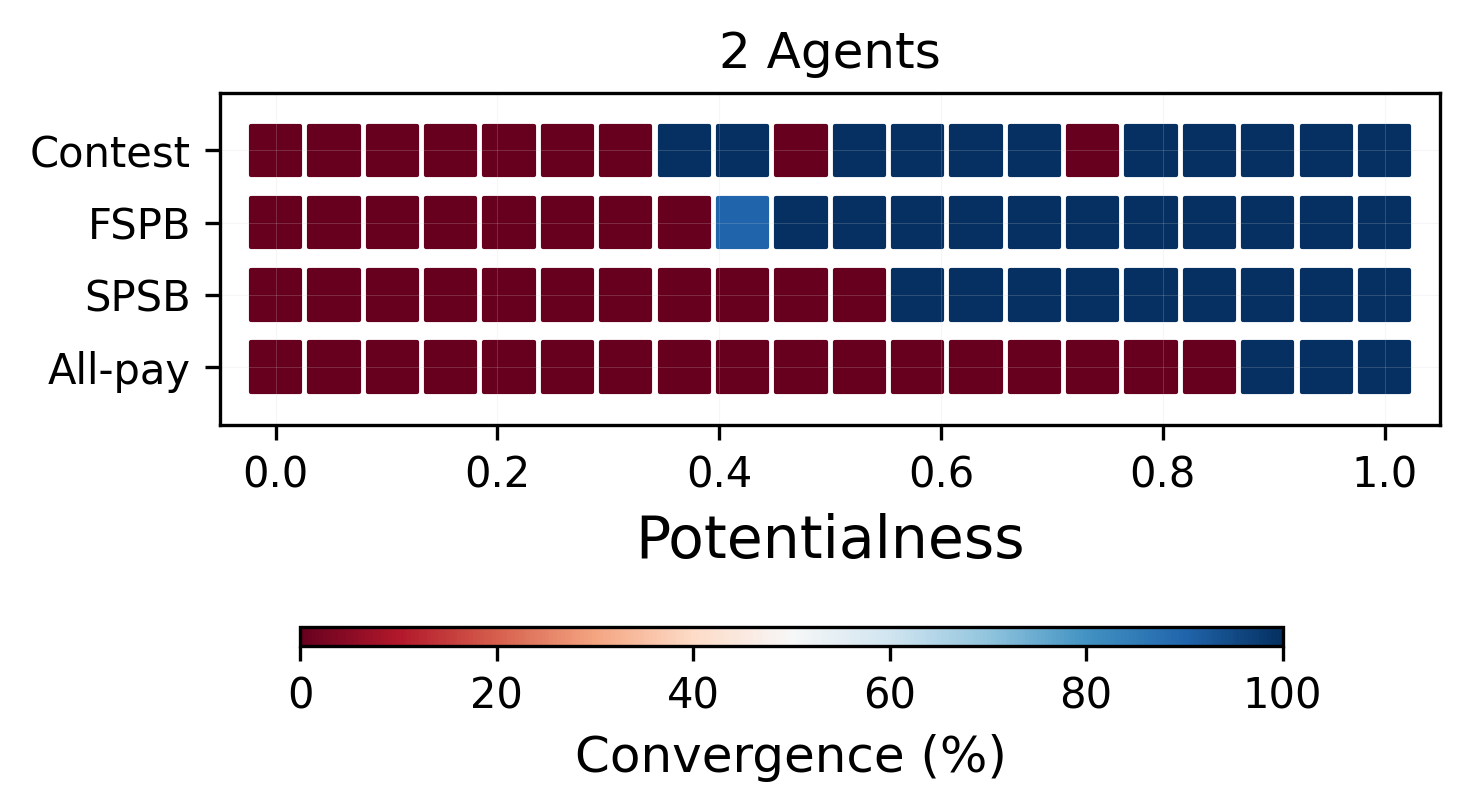

In [186]:
list_games = ["allpay", "spsb", "fpsb", "contest"]
label_games = ["All-pay", "SPSB", "FSPB", "Contest"]
generate_plot_learning_random(list_games, label_games, 2, 11)

In [137]:
fig = plt.figure(tight_layout = True, dpi=DPI, figsize=(5,4))
cbar_ax = fig.add_axes([1.0, 0.30, 0.03, 0.45])

for i, n_agents in enumerate(list_agents):
    # prepare plot
    ax = fig.add_subplot(2, 1, i+1)
    if i == 1:
        ax.set_xlabel("Potentialness", fontsize=FONTSIZE_LABEL)
    ax.set_ylabel("# Actions", fontsize=FONTSIZE_LABEL)
    ax.set_ylim(min(list_actions)-0.8,max(list_actions)+0.8)
    ax.set_yticks(list_actions)
    ax.set_xlim(-0.02, 1.02)
    ax.grid(linestyle="-", linewidth=0.25, color="lightgrey", zorder=-10, alpha=0.2)
    ax.set_title(f"{n_agents} Agents",)

    # get data
    for n_actions in list_actions:

        setting = f"random_matrix_game_uniform_{n_agents}_{n_actions}"
        df = pd.read_csv(f"{PATH_TO_DATA}{tag}/{learner}_{setting}.csv")
        df["potentialness"] = map_bin_to_potentialness(df["bin"], n_bins)
        df = df.groupby(["potentialness"]).agg({"convergence":"mean"}).reset_index()
    
        # plot results
        sc = ax.scatter(
                df.potentialness,
                n_actions * np.ones(len(df)),
                marker="s",
                s=150,
                c=np.array(df.convergence) * 100,
                cmap="RdYlGn",
                vmin=0,
                vmax=100,
                )
                
cbar = fig.colorbar(sc, cax=cbar_ax)
cbar.set_label('Convergence (%)', fontsize=FONTSIZE_LABEL)

array(['allpay', 'contest', 'fpsb', 'spsb'], dtype=object)

In [125]:
tag = "random_learning"

n_agents = 2
n_actions = 2
n_bins = 20

for n_agents in [2,3]:
    for n_actions in [2,3,4,5]:
        setting = f"random_matrix_game_uniform_{n_agents}_{n_actions}"
        df = pd.read_csv(f"{PATH_TO_DATA}{tag}/{learner}_{setting}.csv")
        df = 
        df["potentialness"] = map_bin_to_potentialness(df["bin"], n_bins)
        #df = df.groupby(["potentialness"]).agg({"convergence":"mean"}).reset_index()



In [126]:
df

,convergence,iterations,utility_loss,seed,run,bin,potentialness
0,True,38,1.708156e-11,909809,0,9,0.425
1,True,38,8.902878e-12,909809,1,9,0.425
2,True,37,6.773915e-12,909809,2,9,0.425
3,False,2000,6.778813e-01,909809,3,9,0.425
4,True,18,3.575307e-11,909809,4,9,0.425
...,...,...,...,...,...,...,...
995,True,50,9.849010e-11,235798,5,11,0.525
996,False,2000,4.251073e-01,235798,6,11,0.525
997,True,55,4.971967e-11,235798,7,11,0.525
998,True,16,6.584755e-11,235798,8,11,0.525


/home/oberlechner/projects/matrix_game_learning/venv/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/home/oberlechner/projects/matrix_game_learning/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


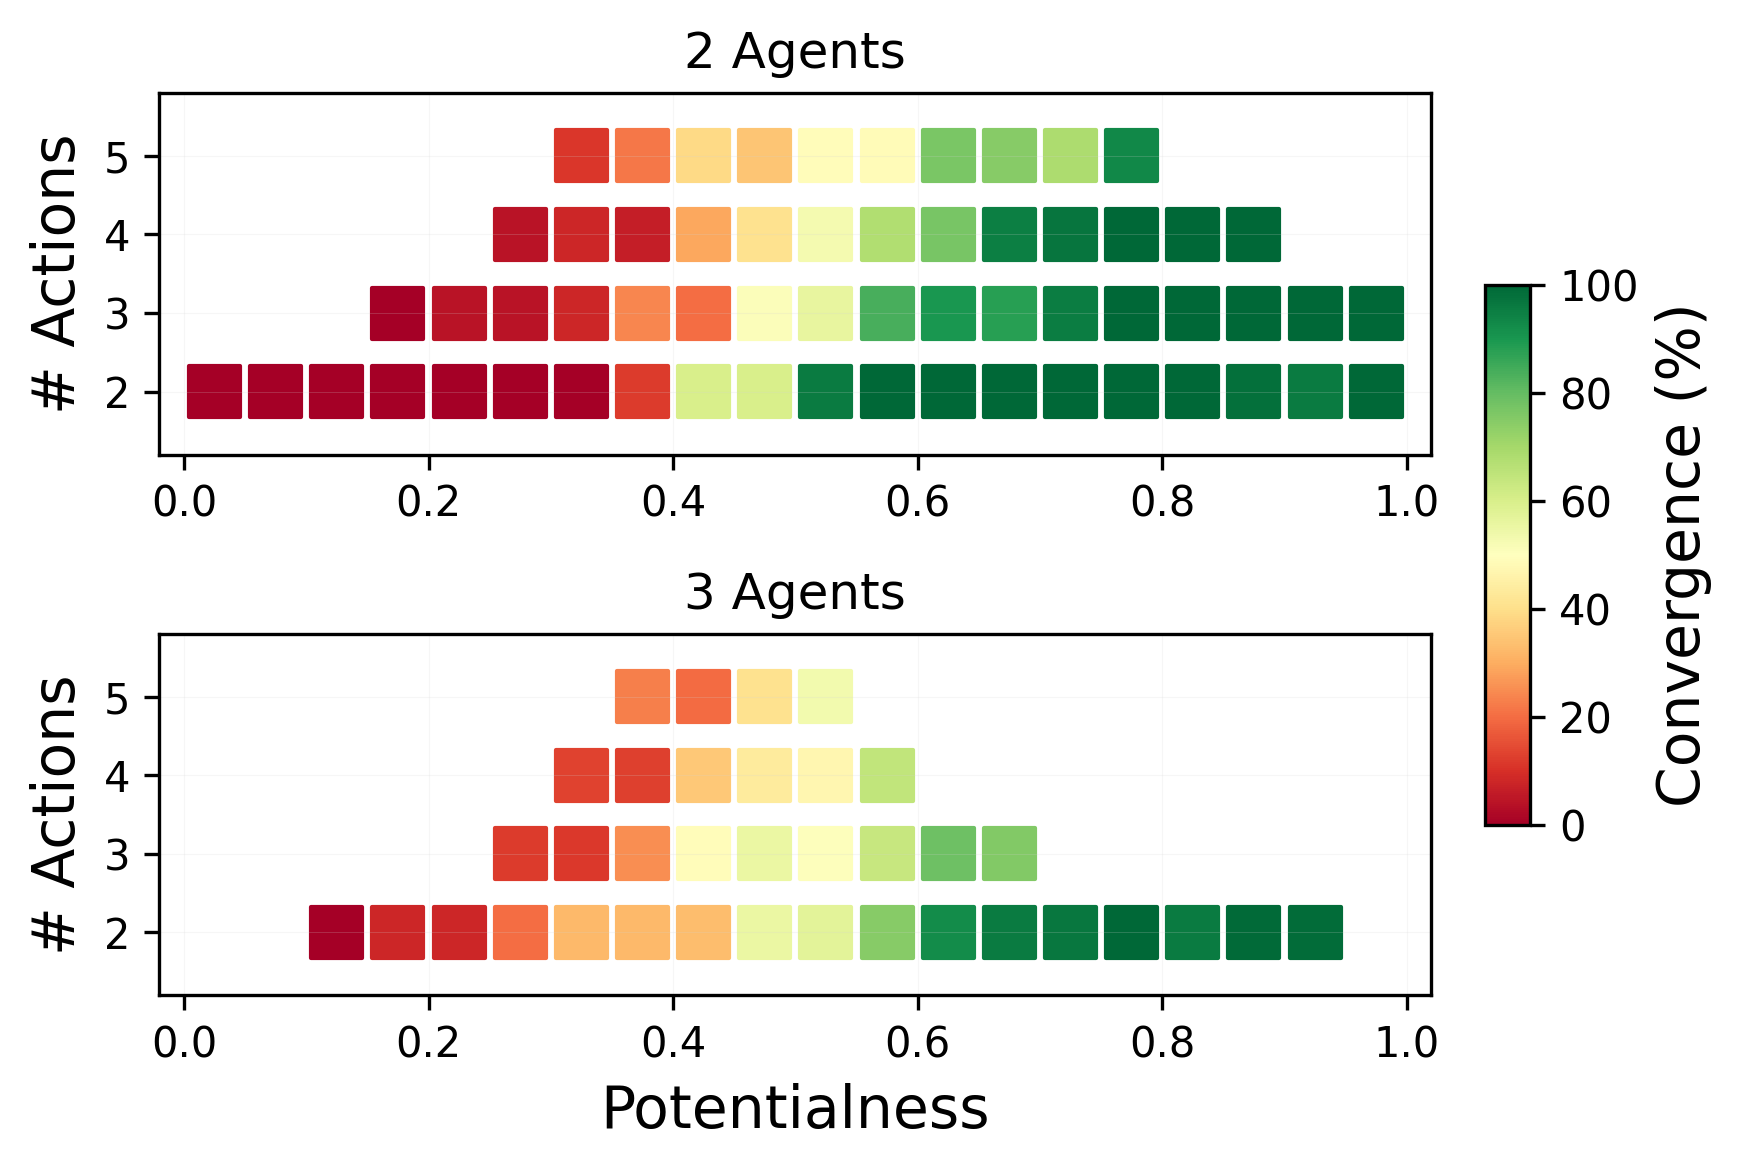

In [105]:
fig = plt.figure(tight_layout = True, dpi=DPI, figsize=(5,4))
cbar_ax = fig.add_axes([1.0, 0.30, 0.03, 0.45])

for i, n_agents in enumerate(list_agents):
    # prepare plot
    ax = fig.add_subplot(2, 1, i+1)
    if i == 1:
        ax.set_xlabel("Potentialness", fontsize=FONTSIZE_LABEL)
    ax.set_ylabel("# Actions", fontsize=FONTSIZE_LABEL)
    ax.set_ylim(min(list_actions)-0.8,max(list_actions)+0.8)
    ax.set_yticks(list_actions)
    ax.set_xlim(-0.02, 1.02)
    ax.grid(linestyle="-", linewidth=0.25, color="lightgrey", zorder=-10, alpha=0.2)
    ax.set_title(f"{n_agents} Agents",)

    # get data
    for n_actions in list_actions:

        setting = f"random_matrix_game_uniform_{n_agents}_{n_actions}"
        df = pd.read_csv(f"{PATH_TO_DATA}{tag}/{learner}_{setting}.csv")
        df["potentialness"] = map_bin_to_potentialness(df["bin"], n_bins)
        df = df.groupby(["potentialness"]).agg({"convergence":"mean"}).reset_index()
    
        # plot results
        sc = ax.scatter(
                df.potentialness,
                n_actions * np.ones(len(df)),
                marker="s",
                s=150,
                c=np.array(df.convergence) * 100,
                cmap="RdYlGn",
                vmin=0,
                vmax=100,
                )
                
cbar = fig.colorbar(sc, cax=cbar_ax)
cbar.set_label('Convergence (%)', fontsize=FONTSIZE_LABEL)

In [64]:
def plot_learning(list_agents, list_actions, n_bins):

    for n_agents in list_agents:
        plt.figure(figsize=(6,2))
        for n_actions in list_actions:
            setting = f"random_matrix_game_uniform_{n_agents}_{n_actions}"
            df = pd.read_csv(f"{PATH_TO_DATA}{tag}/{learner}_{setting}.csv")
            df["potentialness"] = map_bin_to_potentialness(df["bin"], n_bins)
            df = df.groupby(["potentialness"]).agg({"convergence":"mean"}).reset_index()

            plt.scatter(
                df.potentialness,
                n_actions * np.ones(len(df)),
                marker="s",
                s=150,
                c=np.array(df.convergence) * 100,
                cmap="RdYlGn",
                vmin=0,
                vmax=100,
            )
            plt.xlim(-0.02, 1.02)
            plt.xlabel("Potentialness")
            plt.yticks(list_actions)
            plt.ylim(min(list_actions)-0.8,max(list_actions)+0.8)
            plt.ylabel("# Actions")
            plt.title(f"{n_agents} Agents")


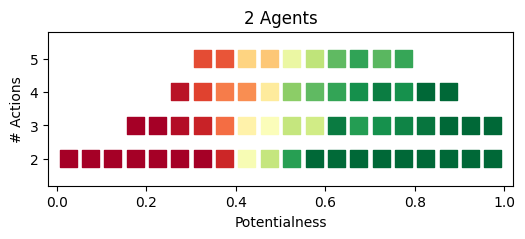

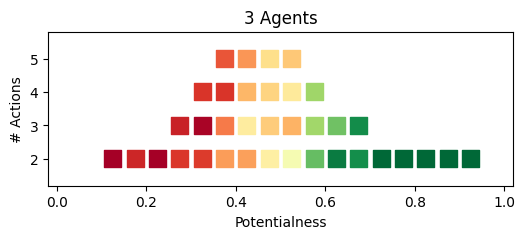

In [65]:
list_agents = [2, 3]
list_actions= [2, 3, 4, 5]
n_bins = 20

plot_learning(list_agents, list_actions, n_bins)

In [70]:
def set_axis(xlim, ylim, title, xlabel: str = "", ylabel: str = ""):
    """General settings for axis"""
    fig = plt.figure(tight_layout=True, dpi=DPI, figsize=(6,5))
    ax = fig.add_subplot(111)
    ax.set_xlabel(xlabel, fontsize=FONTSIZE_LABEL)
    ax.set_ylabel(ylabel, fontsize=FONTSIZE_LABEL)
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    ax.grid(linestyle="-", linewidth=0.25, color="lightgrey", zorder=-10, alpha=0.2)
    ax.set_title(title, fontsize=FONTSIZE_TITLE)
    return fig, ax

(<Figure size 1800x1500 with 1 Axes>,
 <Axes: title={'center': 'test'}, xlabel='test1', ylabel='test3'>)

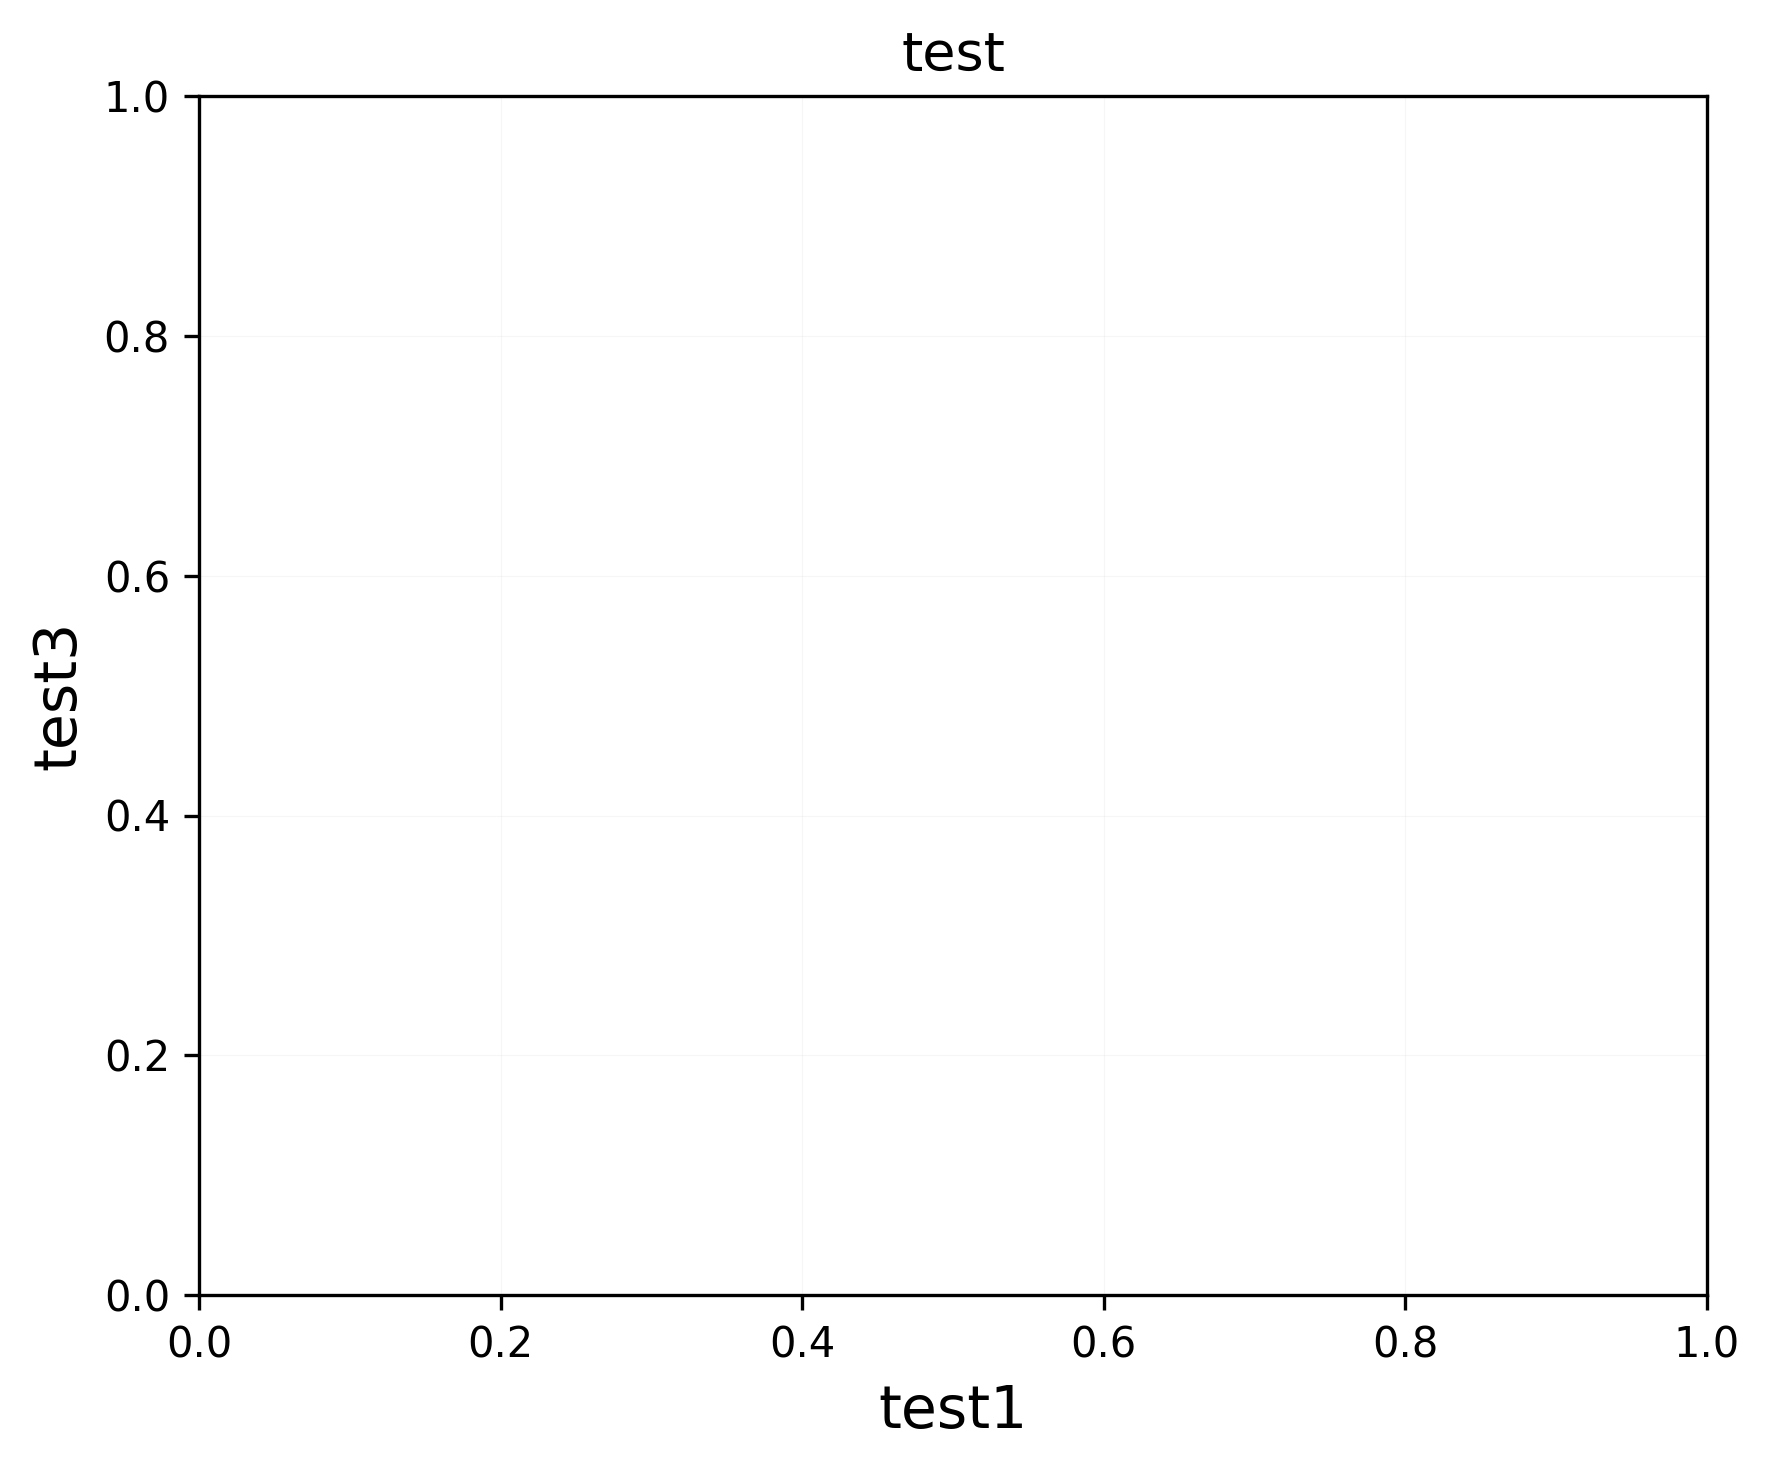

In [69]:
set_axis((0,1), (0, 1), "test", "test1", "test3")

In [121]:
import matplotlib

cmap = matplotlib.colormaps['RdBu']

rgba = cmap(0.8)

In [122]:
rgba

(0.2627450980392157, 0.5764705882352941, 0.7647058823529411, 1.0)

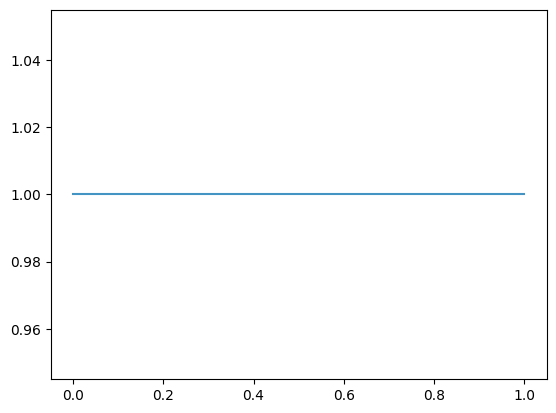

In [123]:
plt.plot([0,1],[1,1], color=rgba)